# Import all necessary modules and load the data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling

import warnings

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
warnings.filterwarnings('ignore')

import os

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
dataframe = pd.read_csv('C:/Users/Seeni/PG-AIML/Project 3 - Ensemble Techniques/bank-full.csv')

In [3]:
dataframe.head(10) # Two columns ('contact' and 'poutcome') where values are 'unknown' && 'pdays' has -1 value --> not sure the meaning.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
dataframe.shape

(45211, 17)

In [5]:
dataframe.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
dataframe.info() # int64(7) -- numerical, object(10) -- string type (Categorical)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
dataframe.describe().T #we may get a better view of each data (mean, median and std dviation, quartiles)

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


In [8]:
#Address all the data challenges such as data pollution, outlier’s treatment and missing values treatment
delvalue1=dataframe.poutcome =='others'
dataframeCopy=dataframe.drop(dataframe[delvalue1].index, axis=0, inplace=False)
print("DataframeCopy :", dataframeCopy['poutcome'].value_counts())

# Treating contact is not a good option --> leave as-is.
#delvalue2=dataframe.poutcome =='contact'
#dataframeCopy=dataframe.drop(dataframe[delvalue2].index, axis=0, inplace=False)
#print("DataframeCopy :", dataframeCopy['contact'].value_counts())

dataframe.isnull().sum() # no null values


DataframeCopy : unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [9]:
dataframe.isnull().values.any() # If there are any null values in data set, just to make sure.

False

In [10]:
dataframe.nunique()


age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [11]:
def plot_corr(dataframeCopy, size=11):
    corr = dataframeCopy.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

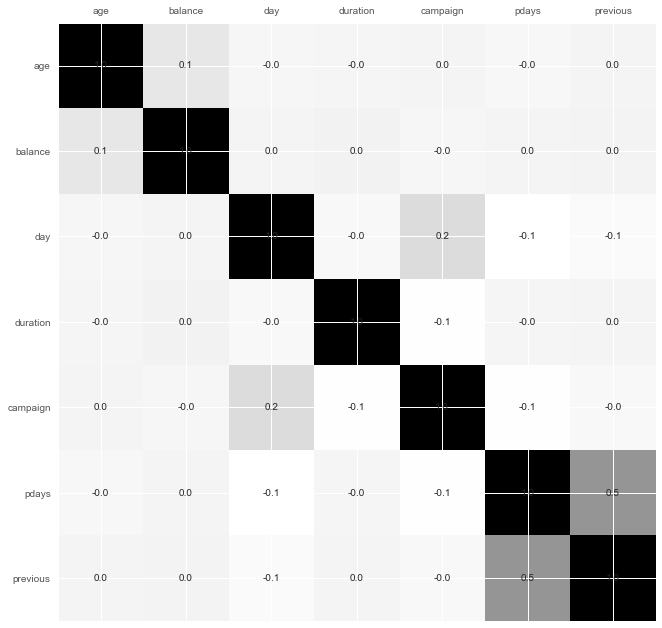

In [12]:
plot_corr(dataframeCopy)

<AxesSubplot:xlabel='education', ylabel='count'>

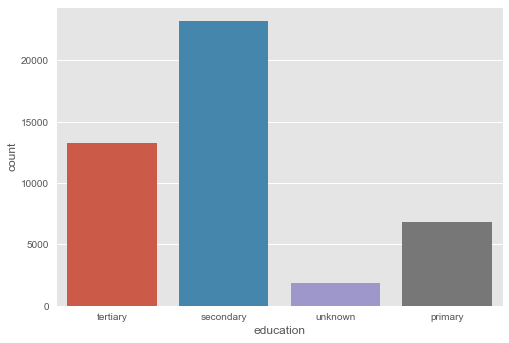

In [13]:
sns.countplot(dataframe['education'])

In [14]:
%matplotlib inline
dataframe['duration'] = dataframe['duration'].apply(lambda n:n/60).round(2)


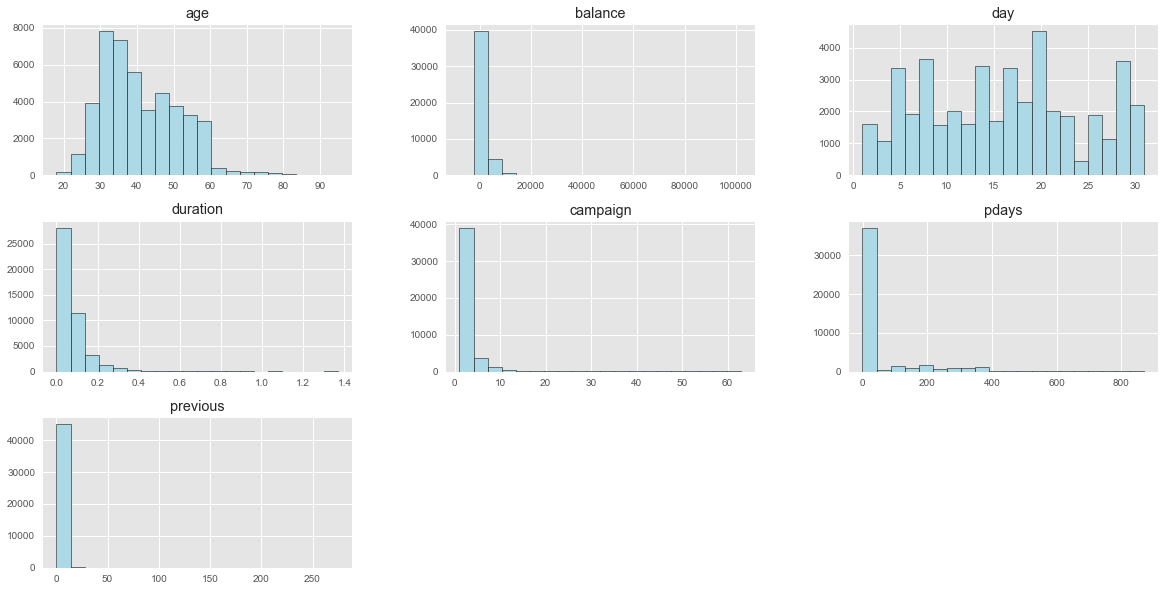

Describe stats of age count   45,211.00
mean        40.94
std         10.62
min         18.00
25%         33.00
50%         39.00
75%         48.00
max         95.00
Name: age, dtype: float64
Describe stats of duration count   45,211.00
mean         0.07
std          0.07
min          0.00
25%          0.03
50%          0.05
75%          0.09
max          1.37
Name: duration, dtype: float64
Describe stats of campaign count   45,211.00
mean         2.76
std          3.10
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         63.00
Name: campaign, dtype: float64
Describe stats of day count   45,211.00
mean        15.81
std          8.32
min          1.00
25%          8.00
50%         16.00
75%         21.00
max         31.00
Name: day, dtype: float64
Describe stats of when the capaign was last done:  count   45,211.00
mean        40.20
std        100.13
min         -1.00
25%         -1.00
50%         -1.00
75%         -1.00
max        871.00
Name: pdays, dtyp

In [15]:
#Change the unit of 'duration' from seconds to minutes

newdf = dataframe.copy()

newdf['duration'] = newdf['duration'].apply(lambda n:n/60).round(2)

#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

newdf.hist(bins=20, figsize=(20,10), color='lightblue', edgecolor = 'black')
plt.show()


print("Describe stats of age",newdf['age'].describe())
print("Describe stats of duration",newdf['duration'].describe())
print("Describe stats of campaign",newdf['campaign'].describe())
print("Describe stats of day", newdf['day'].describe())
print("Describe stats of when the capaign was last done: ", newdf['pdays'].describe())

# ** Understanding from the plots

Age looks uniformally distributed with small standard deviation.
Majority of the people in the age group of 30 to 40 - most of them are middle age group professional -from 33 to 48 years old people fall in the 25th to 75th percentiles
It also seems that around 1500-1600 student has also been targeted for fd which is most likely to ignore the fd option we will verify that in our bivariate analysis.

Balance data is not normally distributed and looks highly skewed and seems to have lot of outliers. We should treat outliers going forward.
There are around 7000, that is almost 10 % people with negative bank balance which may not be interested in FD
The distribution of balance has a huge standard deviation relative to the mean, which says that large variabilities in customers' balance levels.

Duration, as observed from the historgram plot, the duration of contact has a median of 3 minutes. The skewed boxplot indicates that most calls are relatively short. There is a large number of outliers (10 mins to 40 mins), required attention.

Campaign: Median value for no of times bank contacted  to the given customer is 2 times amd max value is 63 times those are normal to high.

Day : It looks normally dustributed, with median value of 16 the last day of contact

pday and other numerical values doesn't help much to us for anything major here. Let us to do bivariate and multivariate analysis to have some more insights.

# Univariate Analysis for the numerical attributes

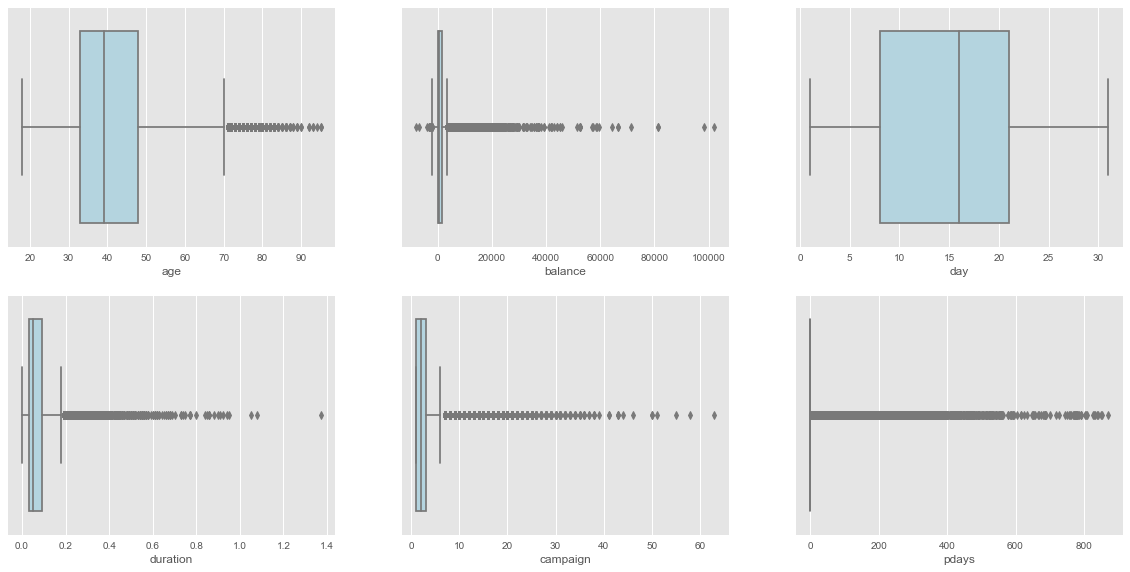

In [16]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf.age, color='lightblue')

plt.subplot(3,3,2)
sns.boxplot(x= newdf.balance, color='lightblue')

plt.subplot(3,3,3)
sns.boxplot(x= newdf.day, color='lightblue')

plt.subplot(3,3,4)
sns.boxplot(x= newdf.duration, color='lightblue')

plt.subplot(3,3,5)
sns.boxplot(x= newdf.campaign, color='lightblue')

plt.subplot(3,3,6)
sns.boxplot(x= newdf.pdays, color='lightblue')

plt.show()

In [17]:
from scipy.stats import zscore
import scipy.stats as stats

# Checking Skewness in all numercial attributes

Skewness = pd.DataFrame({'Skewness' : [stats.skew(dataframeCopy.age),stats.skew(dataframeCopy.day),stats.skew(dataframeCopy.balance),
                                       stats.skew(dataframeCopy.duration),stats.skew(dataframeCopy.campaign),stats.skew(dataframeCopy.pdays),
                                       stats.skew(dataframeCopy.previous) ]},
                        index=['age','day','balance', 'duration', 'campaign', 'pdays', 'previous']) 
Skewness 

,Skewness
age,0.68
day,0.09
balance,8.36
duration,3.14
campaign,4.90
pdays,2.62
previous,41.85


** There seems to be an outlier in age, between the age group 70-90.

Max customer falls in the age range of 32-48 . Median age is very close to 40 

There are some extreme outliers between 60k and 100k. Long tails towards right side so it seems to be highly skewed. Balance attribute needs to be treated for removing the outlier

Day attribite seems to be normally distributed

Remain all the numerical attribute does not seems to be significant 
As they are mostly skewed specially pdays and previous days, there is nothing to statistically find here.

<AxesSubplot:xlabel='balance'>

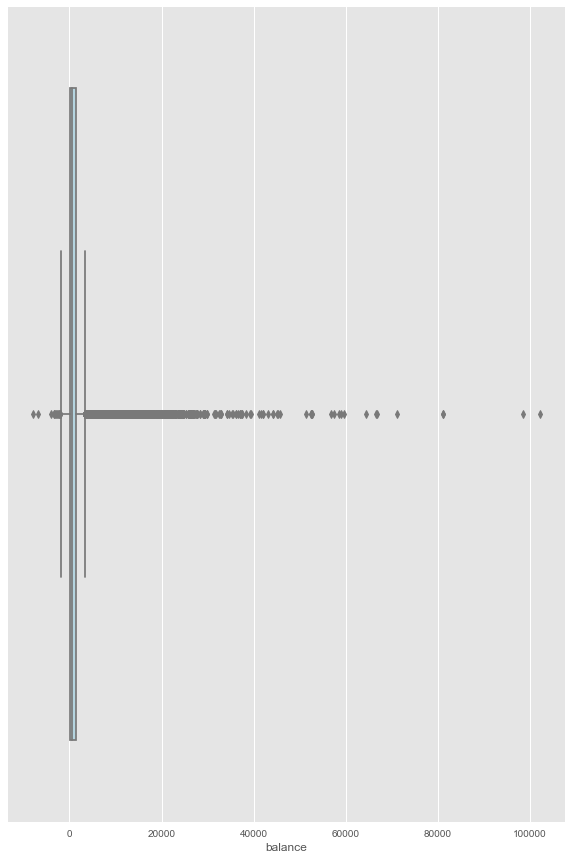

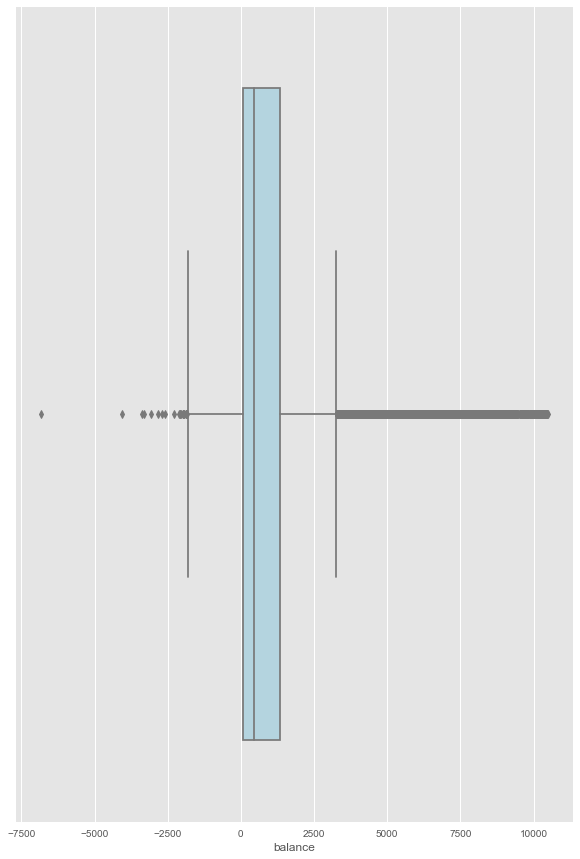

In [18]:
from scipy.stats import zscore

newdf[['balance']].mean()
newdf[['balance']].mean()

newdf['balance_outliers'] = newdf['balance']
newdf['balance_outliers']= zscore(newdf['balance_outliers'])

condition1 = (newdf['balance_outliers']>3) | (newdf['balance_outliers']<-3 )
newdf1 = newdf.drop(newdf[condition1].index, axis = 0, inplace = False)
newdf2 = newdf1.drop('balance_outliers', axis=1)

#Oiginal one 
plt.figure(figsize= (10,15))
sns.boxplot(x= newdf.balance, color='lightblue')

#After outlier treatment using z score

plt.figure(figsize= (10,15))
sns.boxplot(x= newdf2.balance, color='lightblue')
# print("We managed to get rid to some extreme outlier shown below. ")

job count :  blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

x1 marital attribute count:  married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

x2 education level count distribution:  secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

x3 Credit default count distribution:  no     44396
yes      815
Name: default, dtype: int64

x4 housing loan count distribution:  yes    25130
no     20081
Name: housing, dtype: int64

Personal loan count distribution:  no     37967
yes     7244
Name: loan, dtype: int64


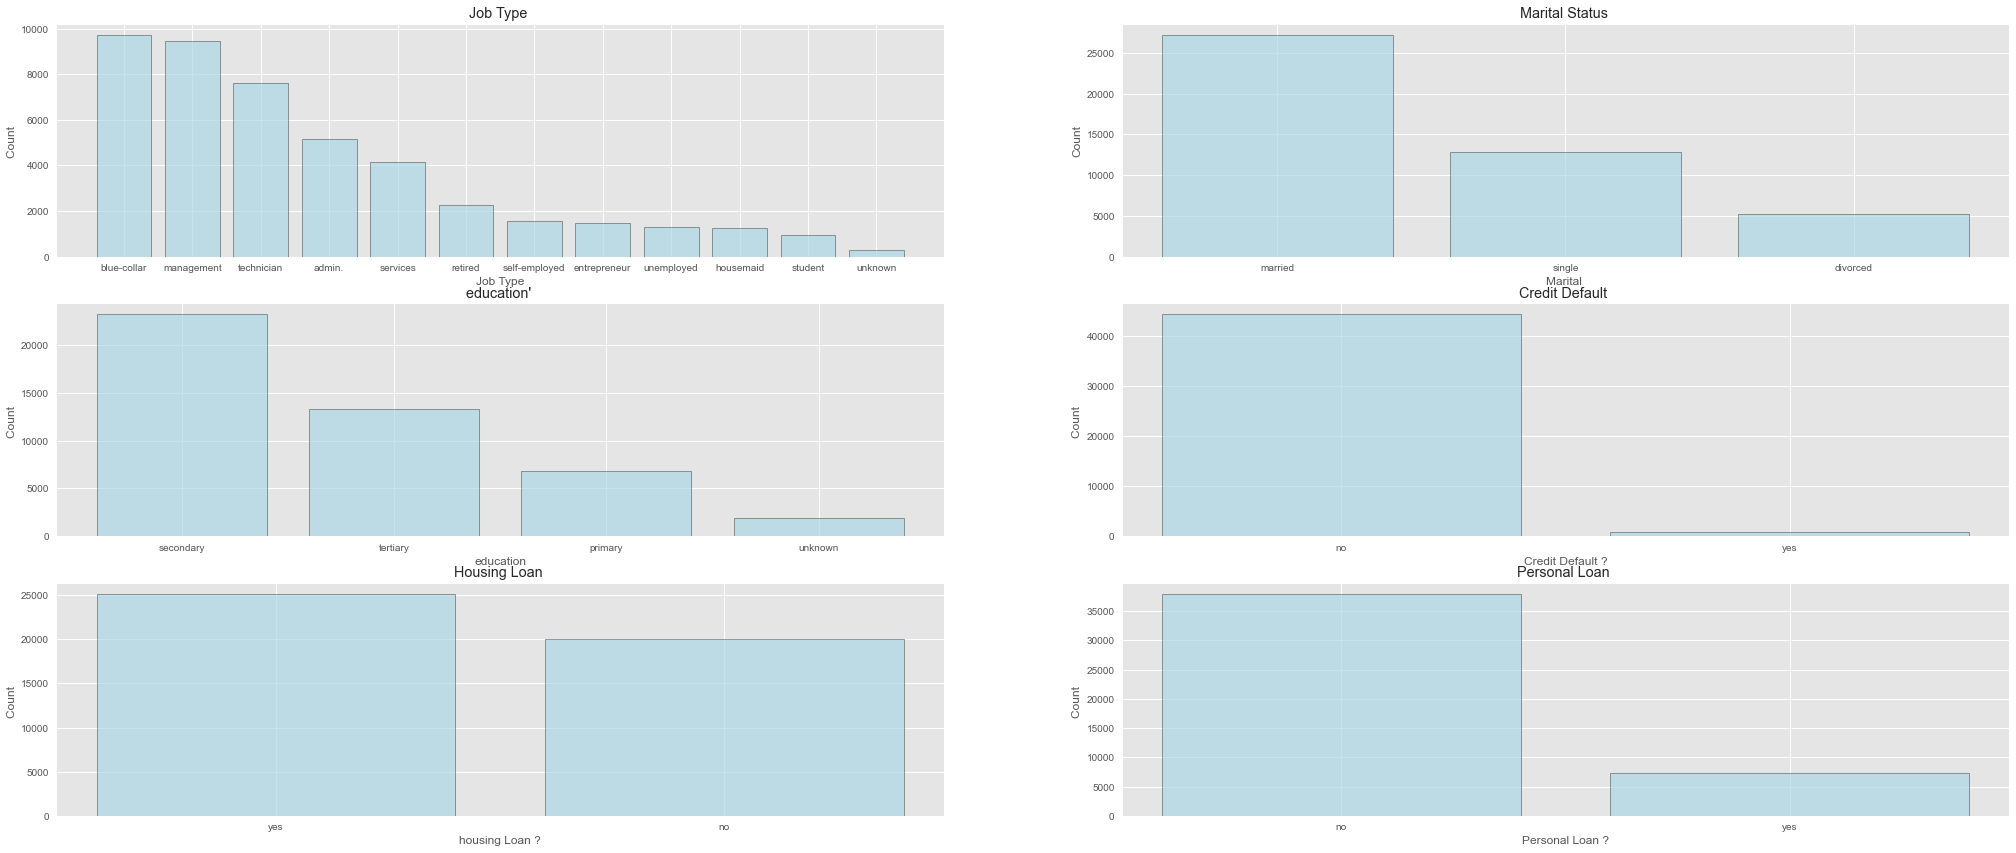

In [19]:
plt.figure(figsize=(35,30))

#Job category
x = newdf.job.value_counts().index    #Values for x-axis
print("job count : ", newdf.job.value_counts())
y = [newdf['job'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(6,2,1)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Job Type')
plt.ylabel('Count ')
plt.title('Job Type ')


#Marital Status 
x1 = newdf.marital.value_counts().index    #Values for x-axis
y1 = [newdf['marital'].value_counts()[j] for j in x1]   # Count of each class on y-axis

print("\nx1 marital attribute count: ", newdf.marital.value_counts())
plt.subplot(6,2,2)
plt.bar(x1,y1, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Marital ')
plt.ylabel('Count')
plt.title('Marital Status ')

#education level

x2 = newdf.education.value_counts().index    #Values for x-axis
y2 = [newdf['education'].value_counts()[k] for k in x2]   # Count of each class on y-axis

print("\nx2 education level count distribution: ", newdf.education.value_counts())

plt.subplot(6,2,3)
plt.bar(x2,y2, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('education')
plt.ylabel('Count ')
plt.title("education' ")

#credit defaulter or not?

x3 = newdf.default.value_counts().index    #Values for x-axis
y3 = [newdf['default'].value_counts()[l] for l in x3]   # Count of each class on y-axis

print("\nx3 Credit default count distribution: ", newdf.default.value_counts())
plt.subplot(6,2,4)
plt.bar(x3,y3, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Credit Default ?')
plt.ylabel('Count ')
plt.title("Credit Default ")

#housing loan availed or not 

x4 = newdf.housing.value_counts().index    #Values for x-axis
y4 = [newdf['housing'].value_counts()[m] for m in x4]   # Count of each class on y-axis

print("\nx4 housing loan count distribution: ", newdf.housing.value_counts())
plt.subplot(6,2,5)
plt.bar(x4,y4, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('housing Loan ?')
plt.ylabel('Count ')
plt.title("Housing Loan ")

#Personal Loan
x5 = newdf.loan.value_counts().index    #Values for x-axis
y5 = [newdf['loan'].value_counts()[n] for n in x5]   # Count of each class on y-axis
print("\nPersonal loan count distribution: ", newdf.loan.value_counts())
plt.subplot(6,2,6)
plt.bar(x5,y5, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Personal Loan ?')
plt.ylabel('Count ')
plt.title("Personal Loan ")
plt.show()

# ** Insight from the plot 
Blue-Collar, Management professionals and technicican jobs are in a majority which were targeted by the bank.

married 27214 single 12790 divorced 5207

Education : secondary 23202 tertiary 13301 primary 6851 unknown 1857

Credit Default: No : 44396 yes : 815
            
PERSONAL LOAN: no 37967 yes 7244

# ** BIVARIATE ANALYSIS
 Bivariate boxplot and Scatter Plot Ananlysis

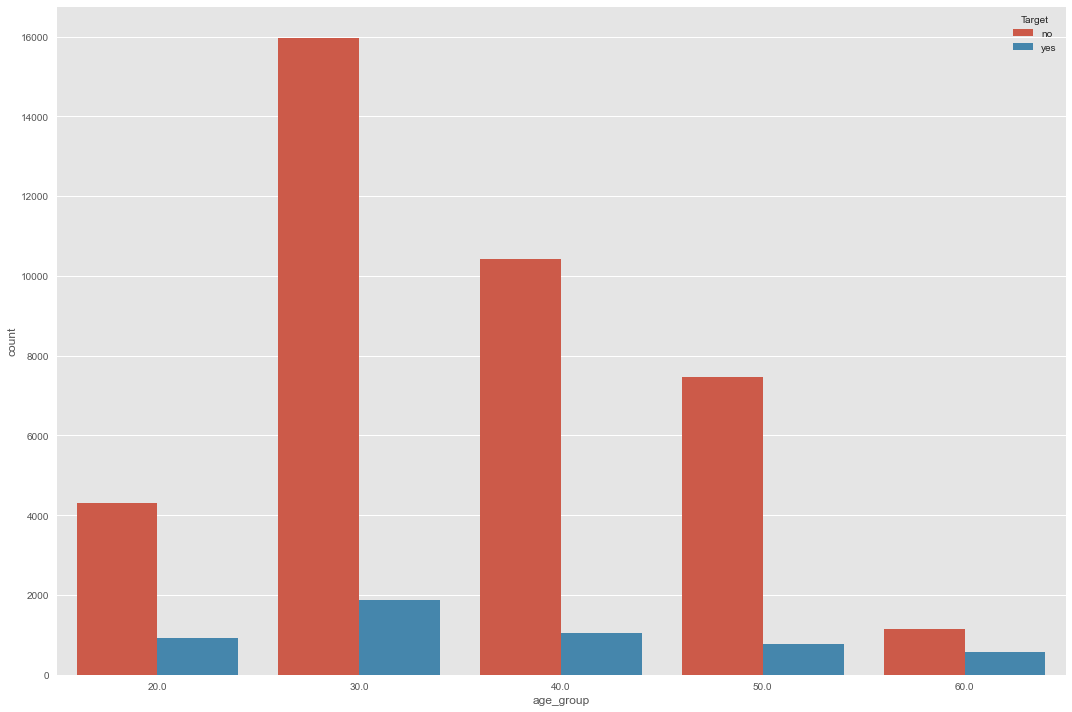

In [20]:
# Age distribution and grouping

lst = [newdf2]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
    count_age_response_pct = pd.crosstab(newdf2['Target'],newdf2['age_group']).apply(lambda x: x/x.sum() * 100)
    
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(newdf2['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% FD Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)


plt.figure(figsize=(15,10))
sns.countplot(newdf2['age_group'], hue = "Target", data=newdf2)
plt.tight_layout()

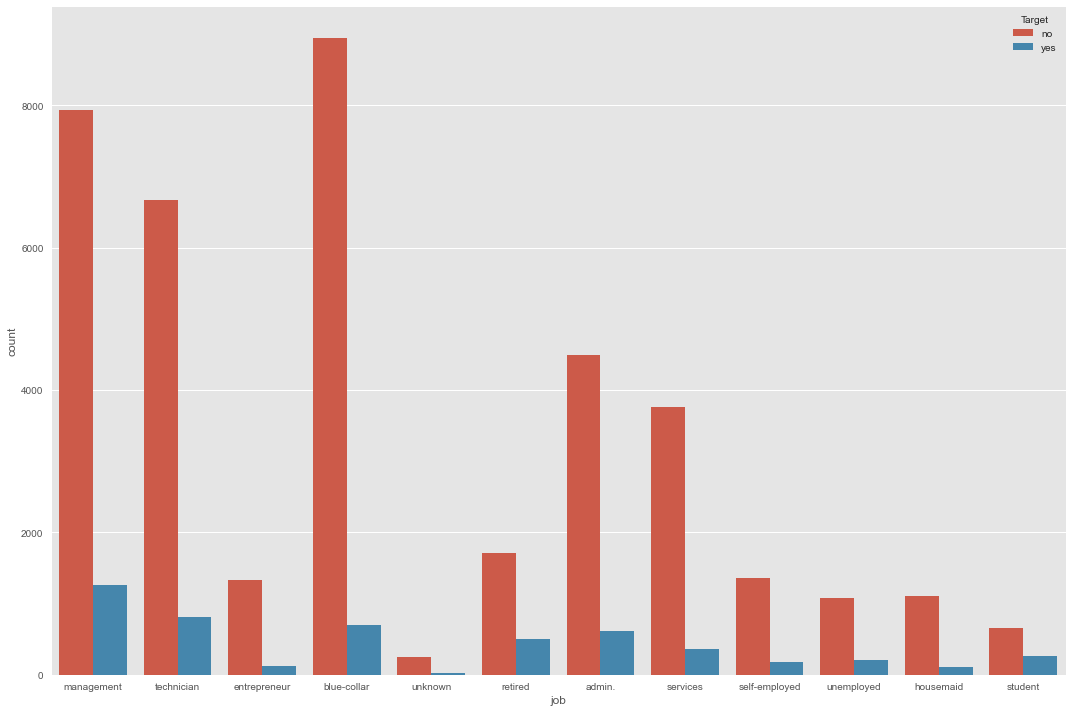

In [21]:
# Job profile based insight

plt.figure(figsize=(15,10))
sns.countplot(newdf2.job, hue = "Target", data=newdf2)
plt.tight_layout()

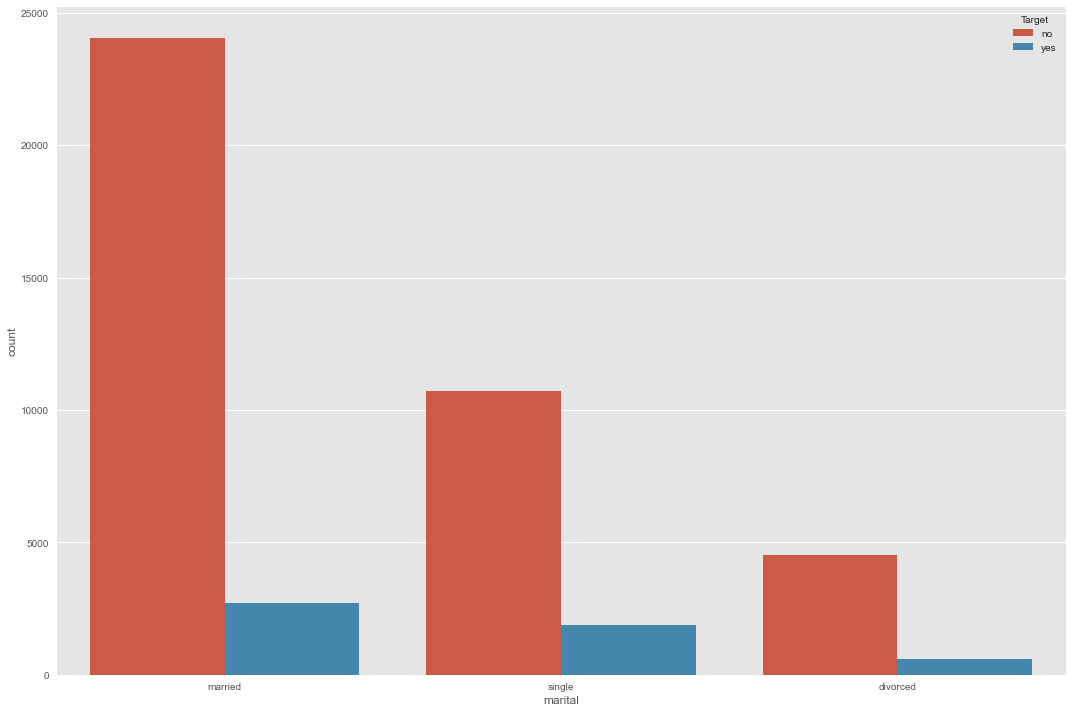

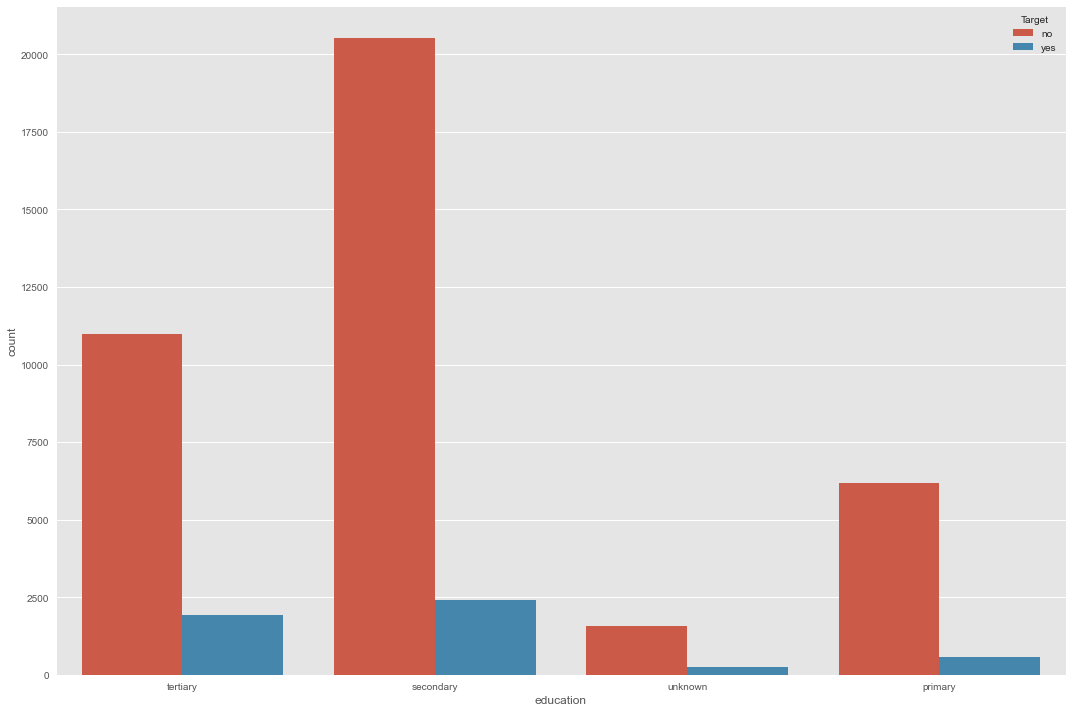

In [22]:
# Martial Status and Education based insight

plt.figure(figsize=(15,10))
sns.countplot(newdf2.marital, hue = "Target", data=newdf2)
plt.tight_layout()

plt.figure(figsize=(15,10))
sns.countplot(newdf2.education, hue = "Target", data=newdf2)
plt.tight_layout()

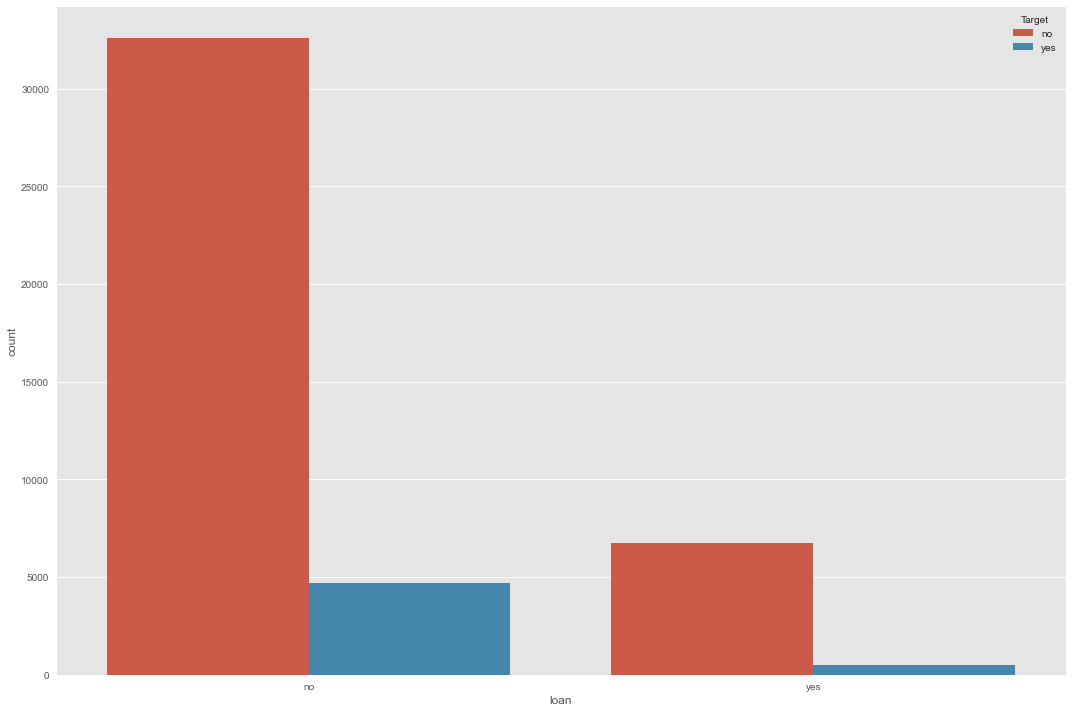

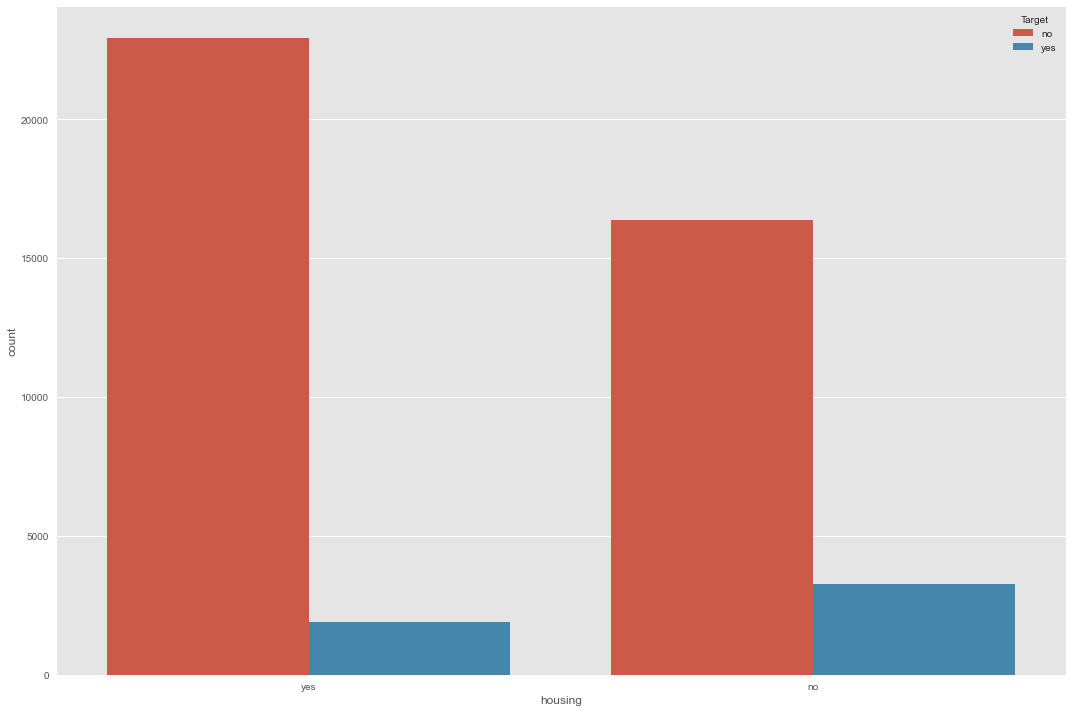

In [23]:
# Loan and housing loan status insight

plt.figure(figsize=(15,10))
sns.countplot(newdf2.loan, hue = "Target", data=newdf2)
plt.tight_layout()


plt.figure(figsize=(15,10))
sns.countplot(newdf2.housing, hue = "Target", data=newdf2)
plt.tight_layout()

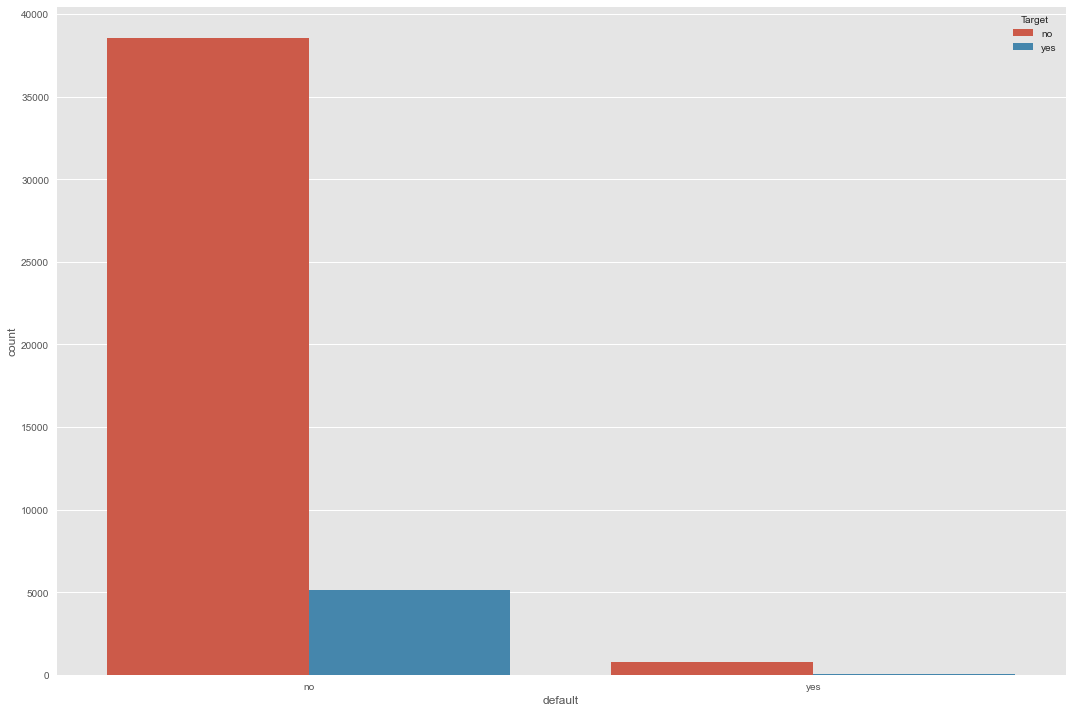

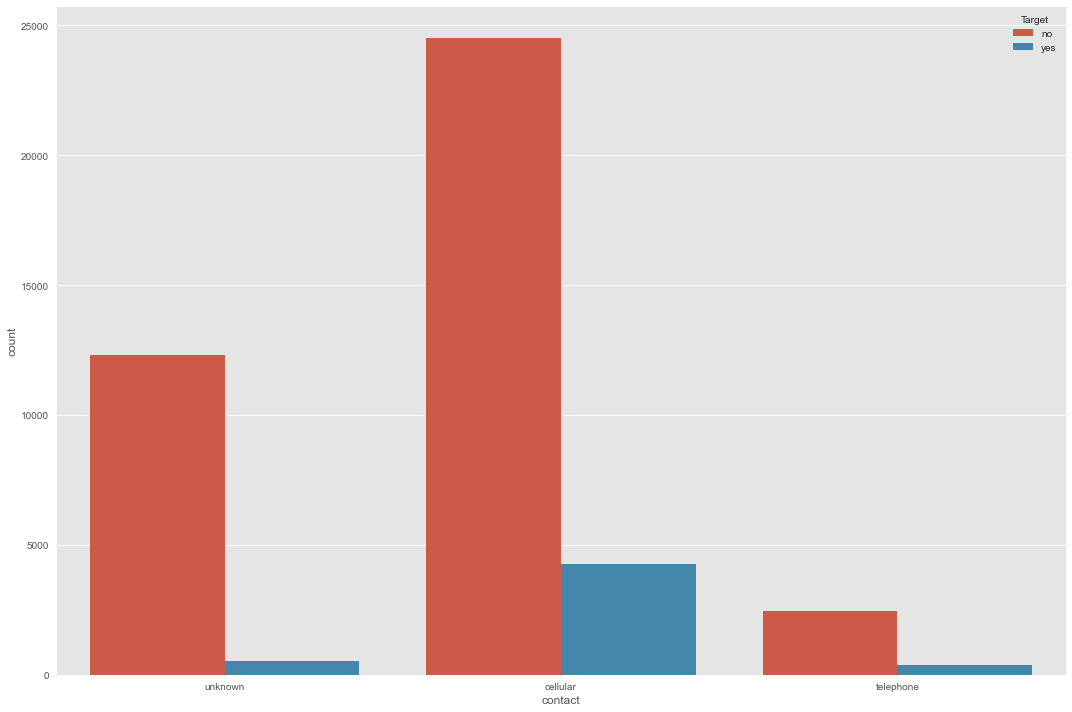

In [24]:
## Credit card default and mode of client communication (may not be related but combine together)
plt.figure(figsize=(15,10))
sns.countplot(newdf2.default, hue = "Target", data=newdf2)
plt.tight_layout()

plt.figure(figsize=(15,10))
sns.countplot(newdf2.contact, hue = "Target", data=newdf2)
plt.tight_layout()

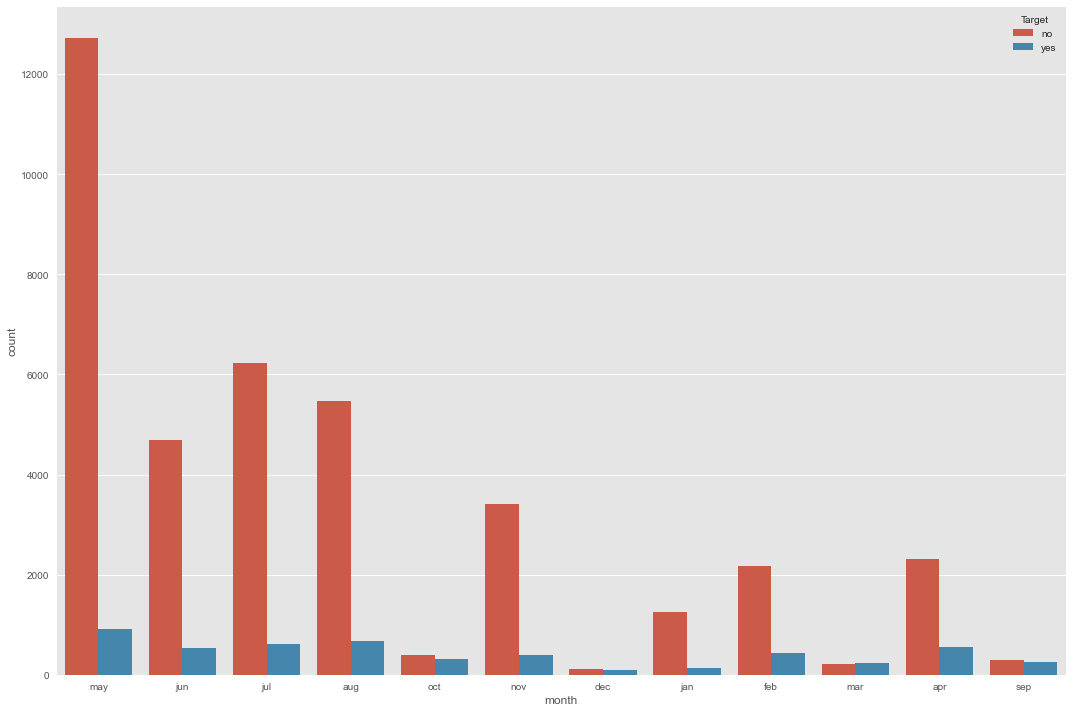

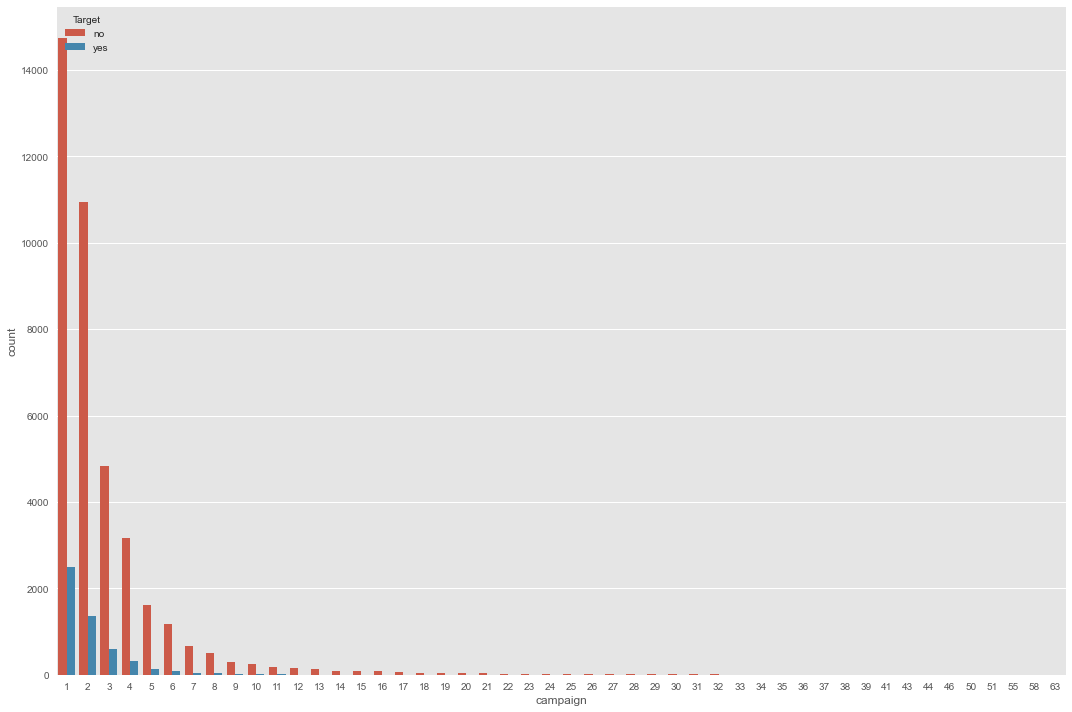

In [25]:
# Based on the last month contact and contact during campaign

plt.figure(figsize=(15,10))
sns.countplot(newdf2.month, hue = "Target", data=newdf2)
plt.tight_layout()


plt.figure(figsize=(15,10))
sns.countplot(newdf2.campaign, hue = "Target", data=newdf2)
plt.tight_layout()

# Various Relationship between features

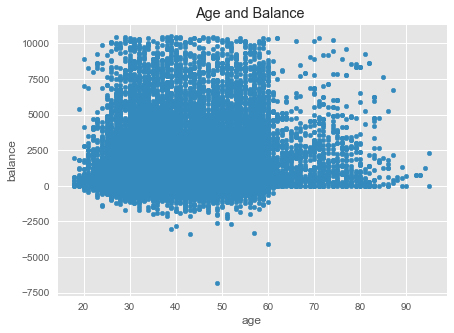

In [26]:
## customer age and balance in a scatter plot

scatter_age_balance = newdf2.plot.scatter('age','balance',figsize = (7,5))

plt.title('Age and Balance ')
plt.show()

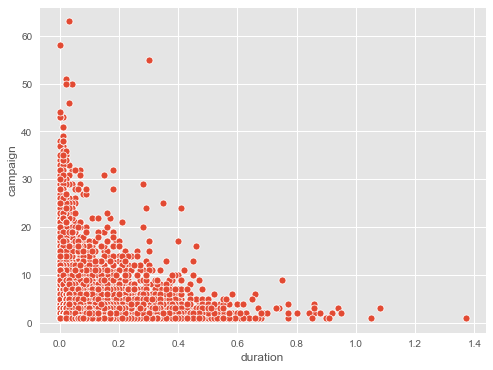

In [27]:
#Duration &  Campaign
plt.figure(figsize=(8,6))
sns.scatterplot(newdf2.duration, newdf2.campaign, palette= ['pink','lightblue'] )
plt.show()

Target       no   yes
age_group            
20.00     82.55 17.45
30.00     89.48 10.52
40.00     90.96  9.04
50.00     90.65  9.35
60.00     66.49 33.51


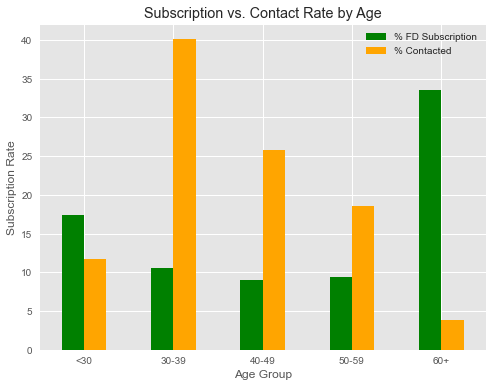

In [28]:
# Age and FD

lst = [newdf2]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
    count_age_response_pct = pd.crosstab(newdf2['Target'],newdf2['age_group']).apply(lambda x: x/x.sum() * 100)
    
count_age_response_pct = count_age_response_pct.transpose() 
print(count_age_response_pct)

age = pd.DataFrame(newdf2['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% FD Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% FD Subscription','% Contacted']].plot(kind = 'bar', figsize=(8,6), color = ('green','orange'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

# ** Prepare the data for the Anaytics


# get model ready and transformation# 

Correlation Matrix
            age  balance   day  duration  campaign  pdays  month_int  previous
age        1.00     0.10 -0.01     -0.00      0.01  -0.02       0.09      0.00
balance    0.10     1.00  0.01      0.04     -0.02   0.01       0.10      0.03
day       -0.01     0.01  1.00     -0.03      0.16  -0.09       0.10     -0.05
duration  -0.00     0.04 -0.03      1.00     -0.09  -0.00      -0.01      0.00
campaign   0.01    -0.02  0.16     -0.09      1.00  -0.09       0.06     -0.03
pdays     -0.02     0.01 -0.09     -0.00     -0.09   1.00      -0.11      0.45
month_int  0.09     0.10  0.10     -0.01      0.06  -0.11       1.00     -0.04
previous   0.00     0.03 -0.05      0.00     -0.03   0.45      -0.04      1.00


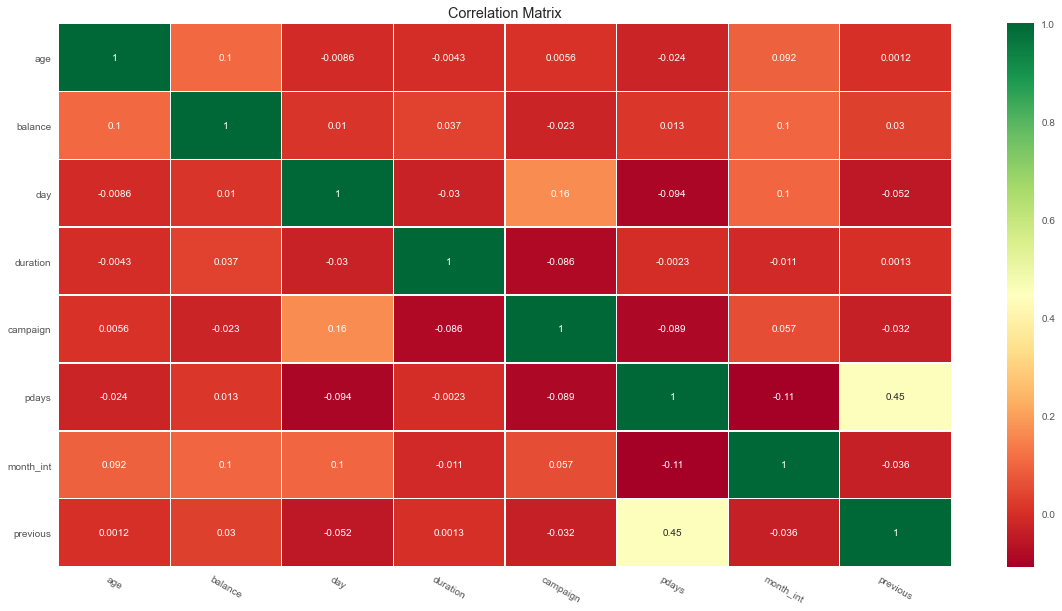

In [29]:
newdf2.corr()

# Let's Change 'month' from words to numbers for easier analysis
lst = [newdf2]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12
    
def convert(newdf2, new_column, old_column):
    newdf2[new_column] = newdf2[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return newdf2[new_column].value_counts()
corr_data = newdf2[['age','balance','day','duration','campaign','pdays','month_int', 'previous','Target']]
corr = corr_data.corr()
print("Correlation Matrix")
print(corr)

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

# Cleaning Up Data and Preparing Data For Model Building

In [30]:
newdf2.describe()


,age,balance,day,duration,campaign,pdays,previous,age_group,month_int
count,"44,466.00","44,466.00","44,466.00","44,466.00","44,466.00","44,466.00","44,466.00","44,466.00","44,466.00"
mean,40.88,"1,084.54",15.80,0.07,2.77,40.24,0.58,36.26,6.13
std,10.60,"1,721.07",8.33,0.07,3.10,100.27,2.31,10.35,2.40
min,18.00,"-6,847.00",1.00,0.00,1.00,-1.00,0.00,20.00,1.00
25%,33.00,68.00,8.00,0.03,1.00,-1.00,0.00,30.00,5.00
50%,39.00,431.00,16.00,0.05,2.00,-1.00,0.00,30.00,6.00
75%,48.00,"1,347.00",21.00,0.09,3.00,-1.00,0.00,40.00,8.00
max,95.00,"10,483.00",31.00,1.37,63.00,871.00,275.00,60.00,12.00


In [31]:
newdf2.head(45212)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,age_group,month_int
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,0.07,1,-1,0,unknown,no,50.00,5.00
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,0.04,1,-1,0,unknown,no,40.00,5.00
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,0.02,1,-1,0,unknown,no,30.00,5.00
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,0.03,1,-1,0,unknown,no,40.00,5.00
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,0.06,1,-1,0,unknown,no,30.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,0.27,3,-1,0,unknown,yes,50.00,11.00
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,0.13,2,-1,0,unknown,yes,60.00,11.00
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,0.31,5,184,3,success,yes,60.00,11.00
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,0.14,4,-1,0,unknown,no,50.00,11.00


In [32]:
condition = newdf2.poutcome == 'other'
newdf2.drop(newdf2[condition].index, axis = 0, inplace = True)
newdf2.describe()

,age,balance,day,duration,campaign,pdays,previous,age_group,month_int
count,"42,659.00","42,659.00","42,659.00","42,659.00","42,659.00","42,659.00","42,659.00","42,659.00","42,659.00"
mean,40.94,"1,080.69",15.86,0.07,2.78,32.21,0.43,36.32,6.16
std,10.58,"1,719.95",8.33,0.07,3.14,90.85,1.56,10.34,2.36
min,18.00,"-6,847.00",1.00,0.00,1.00,-1.00,0.00,20.00,1.00
25%,33.00,66.00,8.00,0.03,1.00,-1.00,0.00,30.00,5.00
50%,39.00,425.00,16.00,0.05,2.00,-1.00,0.00,30.00,6.00
75%,48.00,"1,341.50",21.00,0.09,3.00,-1.00,0.00,40.00,8.00
max,95.00,"10,483.00",31.00,1.37,63.00,871.00,55.00,60.00,12.00


In [33]:
# Treating Education & Job Column
for col in newdf2.select_dtypes(include='object').columns:
    print(col)
    print(newdf2[col].unique())
    
    
newdf2[['job','education']] = newdf2[['job','education']].replace(['unknown'],'other')

#Let's See our dataframe & verify if it has been updated
print("\n\nAfter Treatment", newdf2['education'].count)

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'success']
Target
['no' 'yes']


After Treatment <bound method Series.count of 0         tertiary
1        secondary
2        secondary
3            other
4            other
           ...    
45205    secondary
45206     tertiary
45207      primary
45208    secondary
45209    secondary
Name: education, Length: 42659, dtype: object>


In [34]:
# Remove unwanted columns
newdf2['contact'].value_counts() 

cellular     27170
unknown      12822
telephone     2667
Name: contact, dtype: int64

In [35]:
#get rid of  customer values with 'other' in education column

new_df1 = newdf2.copy()
newdf2.drop('contact', axis=1, inplace = True)
new_df2 = newdf2.copy()


logic = (new_df2['education'] == 'other')
new_df2.drop(new_df2[logic].index, axis = 0, inplace = True)
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40901 entries, 0 to 45209
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        40901 non-null  int64  
 1   job        40901 non-null  object 
 2   marital    40901 non-null  object 
 3   education  40901 non-null  object 
 4   default    40901 non-null  object 
 5   balance    40901 non-null  int64  
 6   housing    40901 non-null  object 
 7   loan       40901 non-null  object 
 8   day        40901 non-null  int64  
 9   month      40901 non-null  object 
 10  duration   40901 non-null  float64
 11  campaign   40901 non-null  int64  
 12  pdays      40901 non-null  int64  
 13  previous   40901 non-null  int64  
 14  poutcome   40901 non-null  object 
 15  Target     40901 non-null  object 
 16  age_group  40901 non-null  float64
 17  month_int  40901 non-null  float64
dtypes: float64(3), int64(6), object(9)
memory usage: 5.9+ MB


In [38]:

lst = [newdf2]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'
    
    
count_balance_response_pct = pd.crosstab(newdf2['Target'],newdf2['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(newdf2['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)# Pre-Processing Data

In [40]:


# Function to replace marital values with numercial
def marital_num(df):
    mar= [df]
    for data in mar: 
        data.loc[data['marital'] == "married", "marital_int"] = 1
        data.loc[data['marital'] == "single", "marital_int"] = 2
        data.loc[data['marital'] == "divorced", "marital_int"] = 3
        
#Job

#JOB: 
def job_num(df):
    jb= [df]
    for data in jb: 
        data.loc[data['job'] == "management", "Job_int"] = 1
        data.loc[data['job'] == "technician", "Job_int"] = 2
        data.loc[data['job'] == "entrepreneur", "Job_int"] = 3
        data.loc[data['job'] == "blue-collar", "Job_int"] = 4
        data.loc[data['job'] == "retired", "Job_int"] = 5
        data.loc[data['job'] == "admin.", "Job_int"] = 6
        data.loc[data['job'] == "services", "Job_int"] = 7
        data.loc[data['job'] == "self-employed", "Job_int"] = 8
        data.loc[data['job'] == "unemployed", "Job_int"] = 9
        data.loc[data['job'] == "student", "Job_int"] = 10
        data.loc[data['job'] == "housemaid", "Job_int"] = 11
        data.loc[data['job'] == "other", "Job_int"] = 12
        
#Education:

def edu_num(df):
    edu= [df]
    for data in edu: 
        data.loc[data['education'] == "primary", "education_int"] = 1
        data.loc[data['education'] == "secondary",  "education_int"] = 2
        data.loc[data['education'] == "tertiary", "education_int"] = 3
        data.loc[data['education'] == "unknown", "education_int"] = 4
    

#    
def pout_num(df):
    pout= [df]
    for data in pout: 
        data.loc[data['poutcome'] == "failure", "poutcome_int"] = 1
        data.loc[data['poutcome'] == "success",  "poutcome_int"] = 2
        data.loc[data['poutcome'] == "unknown", "poutcome_int"] = 3  


marital_num(new_df2)
job_num(new_df2)
edu_num(new_df2)
pout_num(new_df2)
    

convert(new_df2, "housing_binary", "housing")
convert(new_df2, "default_binary", "default")
convert(new_df2, "loan_binary", "loan")
convert(new_df2, "Fd Outcome", "Target")


new_df2.drop(['age','job', 'housing','marital', 'default', 'loan', 'housing', 'education', 'month', 'poutcome', 'Target'], axis = 1, inplace = True) 
new_df2

,balance,day,duration,campaign,pdays,previous,age_group,month_int,marital_int,Job_int,education_int,poutcome_int,housing_binary,default_binary,loan_binary,Fd Outcome
0,2143,5,0.07,1,-1,0,50.00,5.00,1.00,1.00,3.00,3.00,1,0,0,0
1,29,5,0.04,1,-1,0,40.00,5.00,2.00,2.00,2.00,3.00,1,0,0,0
2,2,5,0.02,1,-1,0,30.00,5.00,1.00,3.00,2.00,3.00,1,0,1,0
5,231,5,0.04,1,-1,0,30.00,5.00,1.00,1.00,3.00,3.00,1,0,0,0
6,447,5,0.06,1,-1,0,20.00,5.00,2.00,1.00,3.00,3.00,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,505,17,0.11,2,-1,0,20.00,11.00,2.00,2.00,2.00,3.00,0,0,1,1
45206,825,17,0.27,3,-1,0,50.00,11.00,1.00,2.00,3.00,3.00,0,0,0,1
45207,1729,17,0.13,2,-1,0,60.00,11.00,3.00,5.00,1.00,3.00,0,0,0,1
45208,5715,17,0.31,5,184,3,60.00,11.00,1.00,5.00,2.00,2.00,0,0,0,1


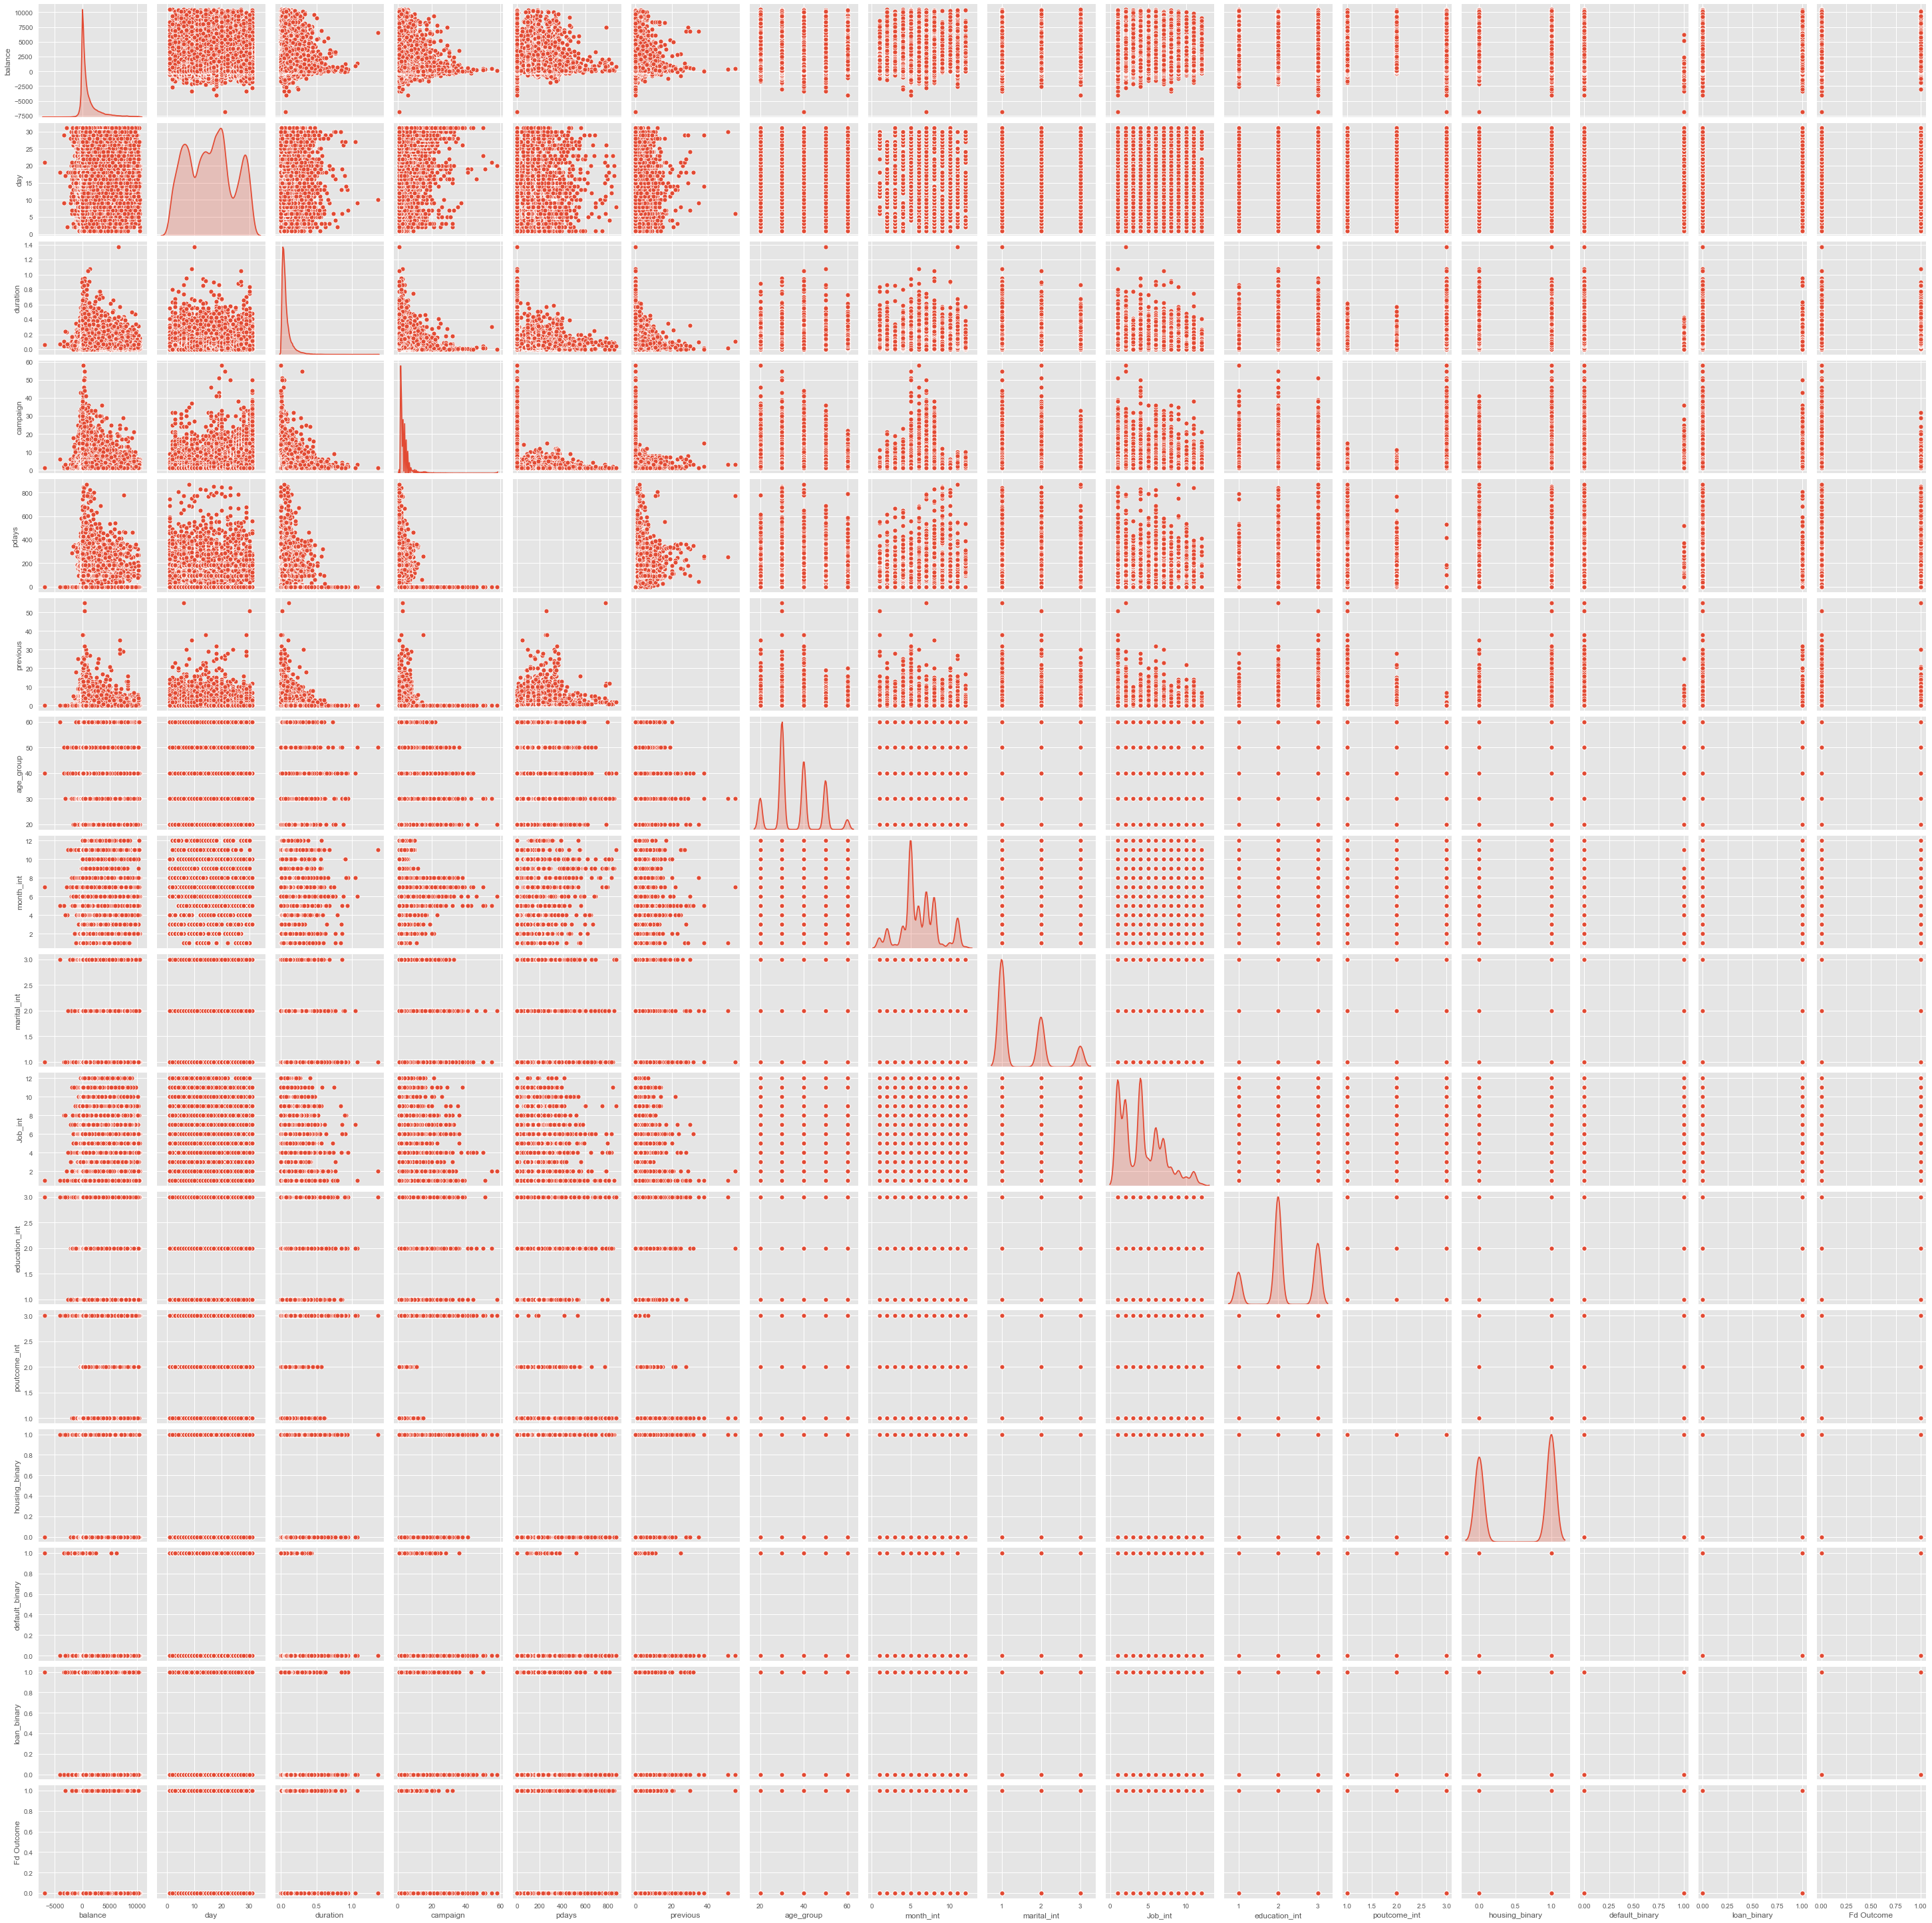

In [41]:
new_df2['Fd Outcome'].value_counts()

sns.pairplot(new_df2,diag_kind="kde")


# ** Create two different data set - Train and Test data

In [43]:
from sklearn.model_selection import train_test_split

# # # Split Into Training and Testing Sets

# Separate out the features and targets & Print Their Shape.

array = new_df2.values

X = array[:,0:15]
y = array[:,15]

# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28630, 15)
(12271, 15)
(28630,)
(12271,)


In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#MINMAX: 
minmax= MinMaxScaler()
X_train2 = pd.DataFrame(minmax.fit_transform(X_train))
X_test2 = pd.DataFrame(minmax.transform(X_test))


MinMax_X_train = X_train2
MinMax_X_test = X_test2
#print("Mimmax scaled train data\n", MinMax_X_train)
#print("Mimmax scaled test data\n", MinMax_X_test)

#STANDARD Sclaer: 

stdsc= StandardScaler()
X_train3 = pd.DataFrame(stdsc.fit_transform(X_train))
X_test3 = pd.DataFrame(stdsc.transform(X_test))

StdSc_X_train = X_train3
StdSc_X_test = X_test3
from sklearn.preprocessing import Normalizer
from scipy import stats

#Normalization Using Normalizer(): 
norm= Normalizer()
X_train4 = pd.DataFrame(norm.fit_transform(X_train))
X_test4 = pd.DataFrame(norm.transform(X_test))

Norm_X_train = X_train4
Norm_X_test = X_test4

# Logistic Model

In [48]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, roc_curve, auc, average_precision_score, roc_auc_score, accuracy_score, precision_recall_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Builing the confusion matrix

Accuracy Score Is :  0.8912069106022329
LogisticRegression F1 score = 0.30359937402190923
LogisticRegression classification Score = 
               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94     10850
         1.0       0.59      0.20      0.30      1421

    accuracy                           0.89     12271
   macro avg       0.75      0.59      0.62     12271
weighted avg       0.87      0.89      0.87     12271

Confusion Matrix Is: [[10645   205]
 [ 1130   291]]


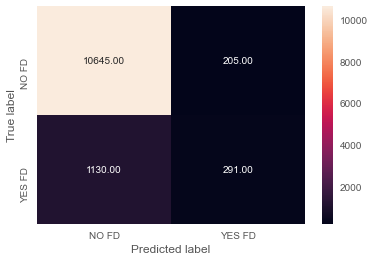

Confusion Matrix HeatMap :  None
Accuracy Score Is :  0.9002526281476653
SVC F1 score = 0.388
SVC classification Score = 
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     10850
         1.0       0.67      0.27      0.39      1421

    accuracy                           0.90     12271
   macro avg       0.79      0.63      0.67     12271
weighted avg       0.88      0.90      0.88     12271

Confusion Matrix Is: [[10659   191]
 [ 1033   388]]


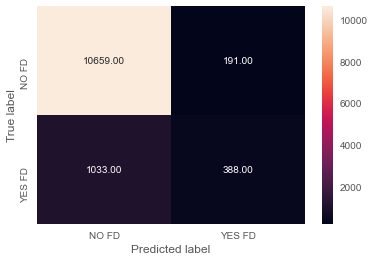

Confusion Matrix HeatMap :  None
Accuracy Score Is :  0.8996821774916469
KNeighborsClassifier F1 score = 0.37417386883579057
KNeighborsClassifier classification Score = 
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     10850
         1.0       0.67      0.26      0.37      1421

    accuracy                           0.90     12271
   macro avg       0.79      0.62      0.66     12271
weighted avg       0.88      0.90      0.88     12271

Confusion Matrix Is: [[10672   178]
 [ 1053   368]]


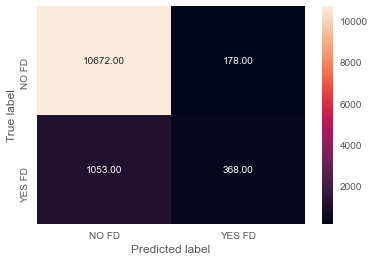

Confusion Matrix HeatMap :  None
Accuracy Score Is :  0.838562464346834
GaussianNB F1 score = 0.38725641818744194
GaussianNB classification Score = 
               precision    recall  f1-score   support

         0.0       0.92      0.89      0.91     10850
         1.0       0.35      0.44      0.39      1421

    accuracy                           0.84     12271
   macro avg       0.63      0.67      0.65     12271
weighted avg       0.86      0.84      0.85     12271

Confusion Matrix Is: [[9664 1186]
 [ 795  626]]


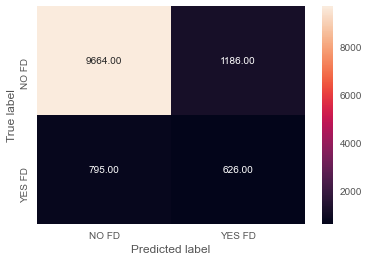

Confusion Matrix HeatMap :  None
Accuracy Score Is :  0.9031048814277565
DecisionTreeClassifier F1 score = 0.46320541760722356
DecisionTreeClassifier classification Score = 
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     10850
         1.0       0.65      0.36      0.46      1421

    accuracy                           0.90     12271
   macro avg       0.78      0.67      0.70     12271
weighted avg       0.89      0.90      0.89     12271

Confusion Matrix Is: [[10569   281]
 [  908   513]]


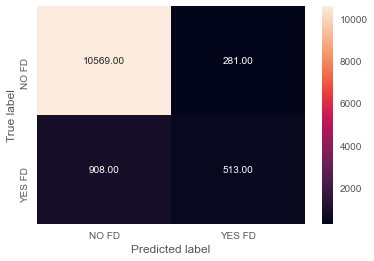

Confusion Matrix HeatMap :  None


In [51]:
def draw_confmatrix(y_test, yhat, str1, str2):
    #Make predictions and evalute
    #model_pred = fit_test_model(model,X_train, y_train, X_test)
    cm = confusion_matrix( y_test, yhat, [0,1] )
    print("Confusion Matrix Is:", cm )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2] , yticklabels = [str1, str2] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


lr = LogisticRegression()
clf = SVC()
knn = KNeighborsClassifier(n_neighbors=17, metric='minkowski', p= 2)
NB = GaussianNB()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
#rfc = RandomForestClassifier(n_estimators=40)

def scorer(i,j,k,l, m):
    for every in (i,j,k,l,m):
        every.fit(StdSc_X_train,y_train)
        yhat= every.predict(StdSc_X_test)
        #every.fit(X_train,y_train)
        print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
        print(every.__class__.__name__, 'F1 score =', f1_score(y_test, yhat))
        print(every.__class__.__name__, 'classification Score =','\n', classification_report(y_test,yhat))
        print("Confusion Matrix HeatMap : ",draw_confmatrix(y_test, yhat, "NO FD", "YES FD"))
        
scorer (lr,clf,knn,NB,dtree)

# understand recall & precision

In [54]:
NavBayer = GaussianNB()
NavBayer.fit(StdSc_X_train, y_train)

DT = DecisionTreeClassifier(criterion="entropy", max_depth=4)
DT.fit(StdSc_X_train, y_train)

SVM = SVC(probability=True)
SVM.fit(StdSc_X_train, y_train)

KNN = KNeighborsClassifier(n_neighbors=17, metric='minkowski', p= 2)
KNN.fit(StdSc_X_train, y_train)

LogReg = LogisticRegression()
LogReg.fit(StdSc_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

None
None
None
None
None


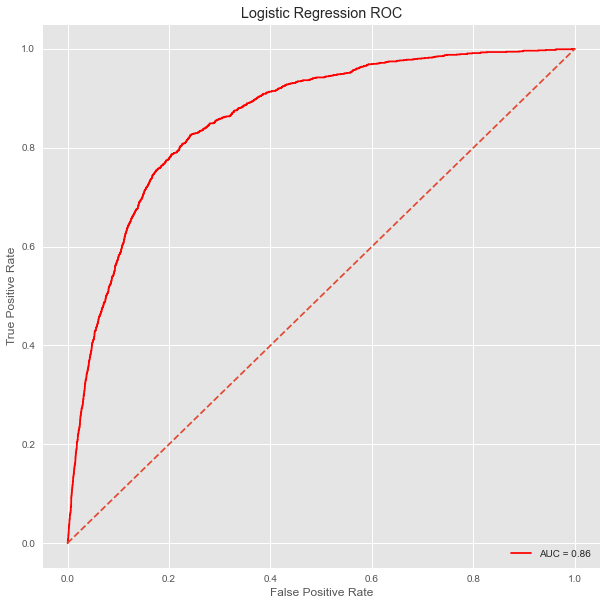

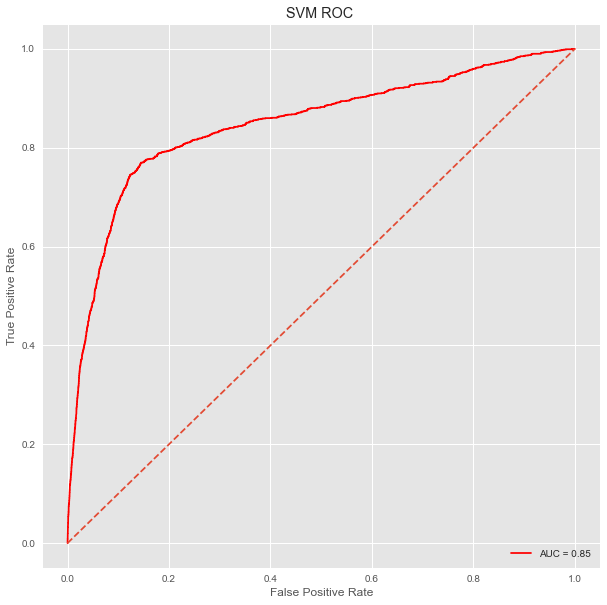

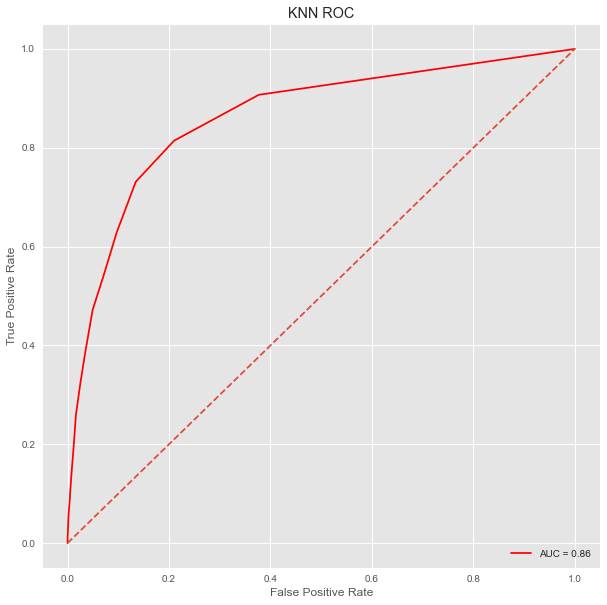

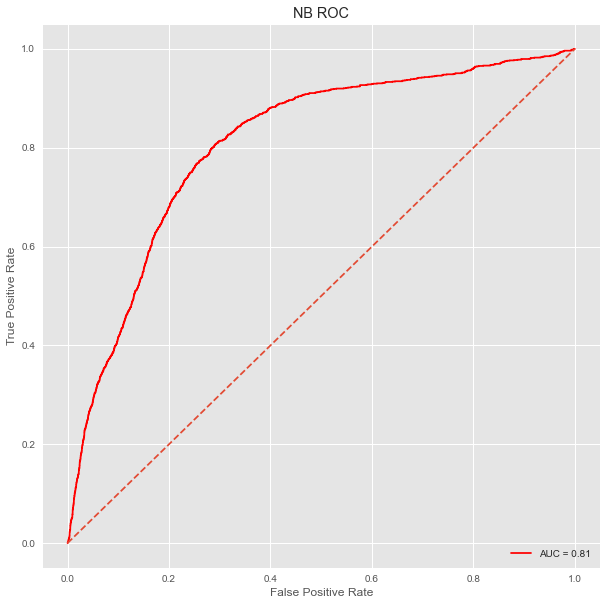

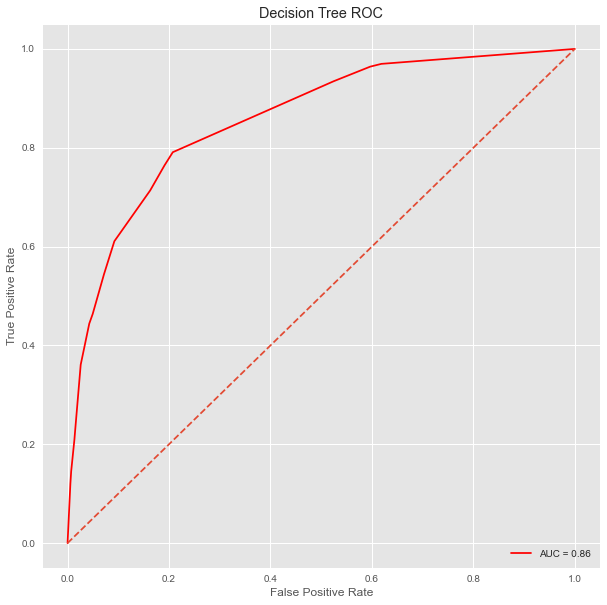

In [53]:
def roc_auc_curve(model, X_test,TITLE):
    # predict probabilities
    probs = model.predict_proba(X_test)[:,1]
    # Calculating roc_auc score
    rocauc = roc_auc_score(y_test, probs)
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.figure(figsize=(10,10))
    plt.title(TITLE)
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % rocauc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

print(roc_auc_curve(LogReg, StdSc_X_test, "Logistic Regression ROC"))
print(roc_auc_curve(SVM, StdSc_X_test, "SVM ROC "))
print(roc_auc_curve(KNN, StdSc_X_test,"KNN ROC"))
print(roc_auc_curve(NavBayer, StdSc_X_test,"NB ROC"))
print(roc_auc_curve(DT, StdSc_X_test,"Decision Tree ROC"))